# Machine Learning Foundation

## Section 1, Part c: EDA Lab

## Introduction

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called `iris_data.csv` found in the [data](data/) directory.

In [1]:
import os
import numpy as np
import pandas as pd

## Question 1

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [2]:
data = pd.read_csv("data/iris_data.csv",dtype={"species":np.str})
data.head()
data.groupby(["species"]).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [3]:
print('the total entries are {}'.format(len(data)))
print('column names: {}'.format(", ".join(list(data.columns))))
data.dtypes


the total entries are 150
column names: sepal_length, sepal_width, petal_length, petal_width, species


sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [4]:
data["species"] = data.species.str.replace("set","cac")

In [5]:
### BEGIN SOLUTION
# The str method maps the following function to each entry as a string
data['species'] = data.species.str.replace('Iris-', '')
# alternatively
# data['species'] = data.species.apply(lambda r: r.replace('Iris-', ''))

data.head()
### END SOLUTION

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,cacosa
1,4.9,3.0,1.4,0.2,cacosa
2,4.7,3.2,1.3,0.2,cacosa
3,4.6,3.1,1.5,0.2,cacosa
4,5.0,3.6,1.4,0.2,cacosa


## Question 3

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [6]:
data.species.value_counts()

cacosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [7]:
des = data.describe()

In [8]:
des.loc["range"] = des.loc["max"] - des.loc["min"]

In [9]:
des

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
range,3.600000,2.400000,5.900000,2.400000


In [10]:
print(data.species.value_counts())

cacosa        50
virginica     50
versicolor    50
Name: species, dtype: int64


In [11]:
df_setosa = data[data.species == "caccosa"]
print( np.mean(df_setosa) )
#print( np.percentile(df_setosa,[0.25,0.5,0.75]) )
#np.percentile(df_setosa["sepal_length"],[0.25,0.5,0.75])
#np.max(df_setosa["sepal_length"])

sepal_length    NaN
sepal_width     NaN
petal_length    NaN
petal_width     NaN
species         NaN
dtype: object


In [12]:
### BEGIN SOLUTION
# One way to count each species
data.species.value_counts()

cacosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [13]:
# Select just the rows desired from the 'describe' method and add in the 'median'
stats_df = data.describe()

#stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

#out_fields = ['mean','25%','50%','75%', 'range']
#stats_df = stats_df.loc[out_fields]
#stats_df.rename({'50%': 'median'}, inplace=True)
stats_df
### END SOLUTION

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [14]:
data.groupby("species").median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
cacosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [15]:
data.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
cacosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [16]:
virg = data[data.species == "virginica"].iloc[:,:-1]
virg.apply([np.mean,np.median])

,sepal_length,sepal_width,petal_length,petal_width
mean,6.588,2.974,5.552,2.026
median,6.500,3.000,5.550,2.000


In [17]:
print(data.groupby("species").mean())
print(data.groupby("species").median())

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
cacosa             5.006        3.418         1.464        0.244
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
cacosa               5.0          3.4          1.50          0.2
versicolor           5.9          2.8          4.35          1.3
virginica            6.5          3.0          5.55          2.0


In [18]:
### BEGIN SOLUTION
# The mean calculation
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
cacosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [19]:
# The median calculation
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
cacosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [20]:
# applying multiple functions at once - 2 methods

data.groupby('species').agg(['mean', 'median'])  # passing a list of recognized strings
data.groupby('species').agg([np.mean, np.median])  # passing a list of explicit aggregation functions

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
cacosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
cacosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [21]:
# If certain fields need to be aggregated differently, we can do:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)
### END SOLUTION

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
cacosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
cacosa        0.2  
versicolor    1.3  
virginica     2.0

## Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

In [22]:
import matplotlib.pyplot as plt

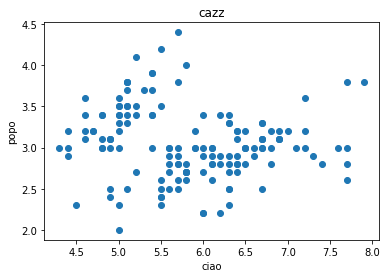

In [23]:
plt.scatter(data.sepal_length, data.sepal_width)
plt.xlabel("ciao")
plt.ylabel("popo")
plt.title("cazz")
plt.show()

In [24]:
### BEGIN SOLUTION
import matplotlib.pyplot as plt
%matplotlib inline

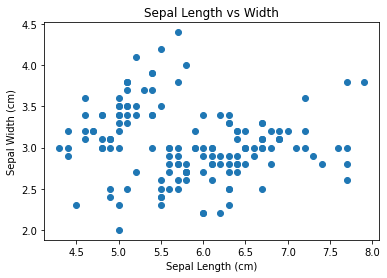

In [25]:
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');
### END SOLUTION

## Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate. 

(array([1., 0., 0., 0., 1., 4., 1., 4., 2., 6., 9., 0., 7., 3., 1., 4., 1.,
        0., 5., 1.]),
 array([4.9 , 5.05, 5.2 , 5.35, 5.5 , 5.65, 5.8 , 5.95, 6.1 , 6.25, 6.4 ,
        6.55, 6.7 , 6.85, 7.  , 7.15, 7.3 , 7.45, 7.6 , 7.75, 7.9 ]),
 <BarContainer object of 20 artists>)

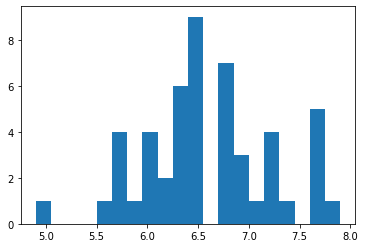

In [26]:
plt.hist(data[data.species == "virginica"].sepal_length, bins=20)

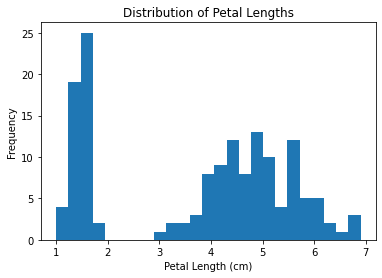

In [27]:
### BEGIN SOLUTION
# Using Matplotlib's plotting functionality
ax = plt.axes()
ax.hist(data.petal_length, bins=25);

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

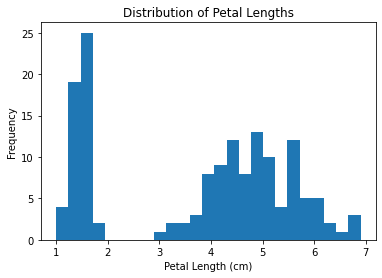

In [28]:
# Alternatively using Pandas plotting functionality
ax = data.petal_length.plot.hist(bins=25)

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');
### END SOLUTION

## Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

<AxesSubplot:ylabel='Frequency'>

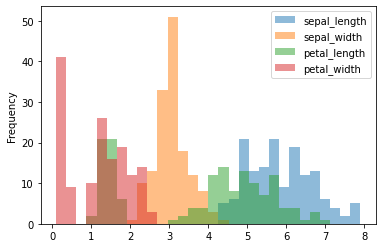

In [29]:
data.plot.hist(alpha=0.5, bins=30)

array([<AxesSubplot:title={'center':'sepal_length'}>,
       <AxesSubplot:title={'center':'sepal_width'}>,
       <AxesSubplot:title={'center':'petal_length'}>,
       <AxesSubplot:title={'center':'petal_width'}>], dtype=object)

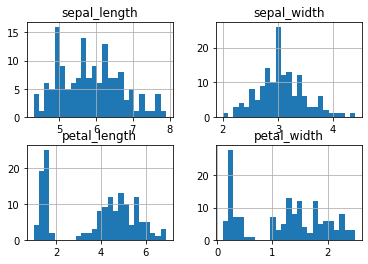

In [30]:
p = data.hist(bins=25)
p.flatten()

array([<AxesSubplot:title={'center':'sepal_length'}>,
       <AxesSubplot:title={'center':'sepal_width'}>,
       <AxesSubplot:title={'center':'petal_length'}>,
       <AxesSubplot:title={'center':'petal_width'}>], dtype=object)

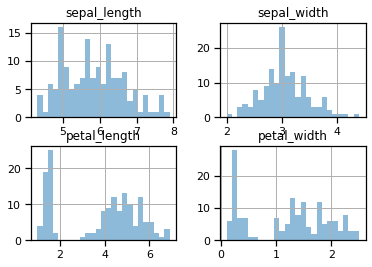

In [31]:
import seaborn as sns
sns.set_context('notebook')
### BEGIN SOLUTION
# This uses the `.plot.hist` method
ax = data.hist(bins=25, alpha=0.5)
#ax.set_xlabel('Size (cm)');
ax.flatten()

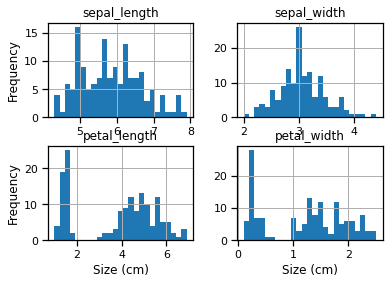

In [32]:
# To create four separate plots, use Pandas `.hist` method
axList = data.hist(bins=25)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')
### END SOLUTION

## Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

In [33]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,cacosa
1,4.9,3.0,1.4,0.2,cacosa
2,4.7,3.2,1.3,0.2,cacosa
3,4.6,3.1,1.5,0.2,cacosa
4,5.0,3.6,1.4,0.2,cacosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


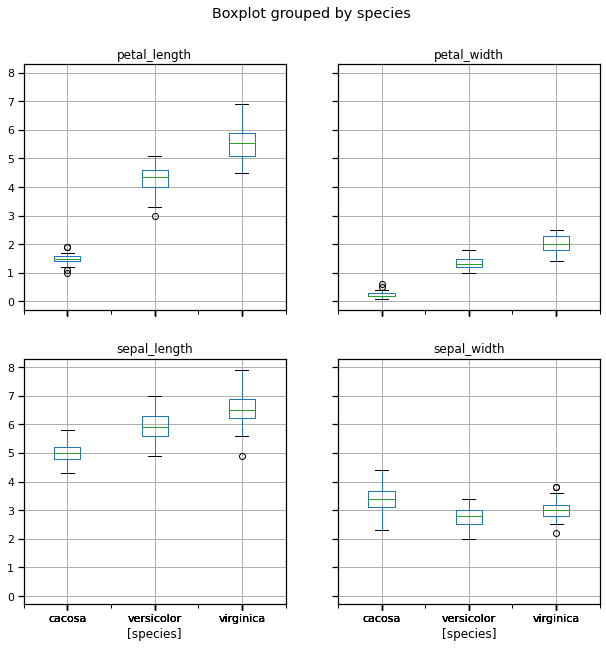

In [34]:
### BEGIN SOLUTION
# Here we have four separate plots
data.boxplot(by='species', figsize=(10,10));
### END SOLUTION

In [35]:
sns.boxplot(data=data, hue="species")

ValueError: Cannot use `hue` without `x` and `y`

## Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

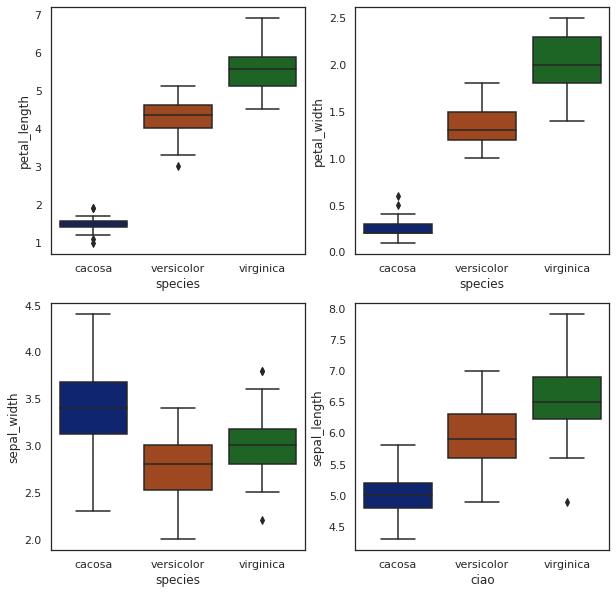

In [116]:
plt.figure(1, figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(x="species",y="petal_length",data=data)
plt.subplot(2,2,2)
sns.boxplot(x="species",y="petal_width",data=data)
plt.subplot(2,2,3)
sns.boxplot(x="species",y="sepal_width",data=data)
plt.subplot(2,2,4)
p = sns.boxplot(x="species",y="sepal_length",data=data)
p.set_xlabel("ciao")
plt.show()


In [112]:
data.set_index("species").stack().reset_index()

,species,level_1,0
0,cacosa,sepal_length,5.1
1,cacosa,sepal_width,3.5
2,cacosa,petal_length,1.4
3,cacosa,petal_width,0.2
4,cacosa,sepal_length,4.9
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,sepal_length,5.9
597,virginica,sepal_width,3.0
598,virginica,petal_length,5.1


In [113]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal_length,5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal_width,3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal_length,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal_width,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8
species,cacosa,cacosa,cacosa,cacosa,cacosa,cacosa,cacosa,cacosa,cacosa,cacosa,...,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica


In [86]:
### BEGIN SOLUTION
# First we have to reshape the data so there is 
# only a single measurement in each column

plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()
### END SOLUTION

,species,measurement,size
0,cacosa,sepal_length,5.1
1,cacosa,sepal_width,3.5
2,cacosa,petal_length,1.4
3,cacosa,petal_width,0.2
4,cacosa,sepal_length,4.9


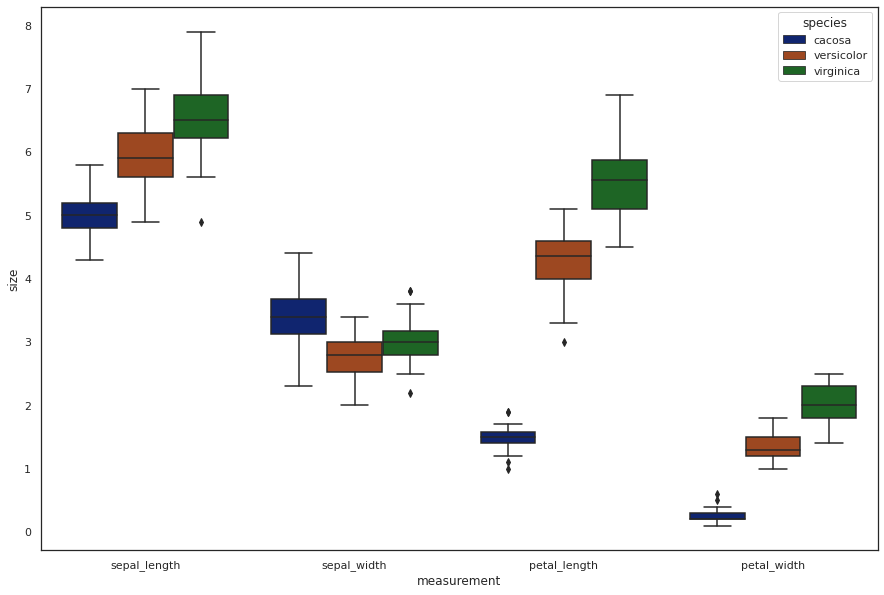

In [95]:
### BEGIN SOLUTION
# Now plot the dataframe from above using Seaborn

#sns.set_style('white')
#sns.set_context('notebook')
#sns.set_palette('dark')

f = plt.figure(figsize=(15,10))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);
### END SOLUTION

## Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

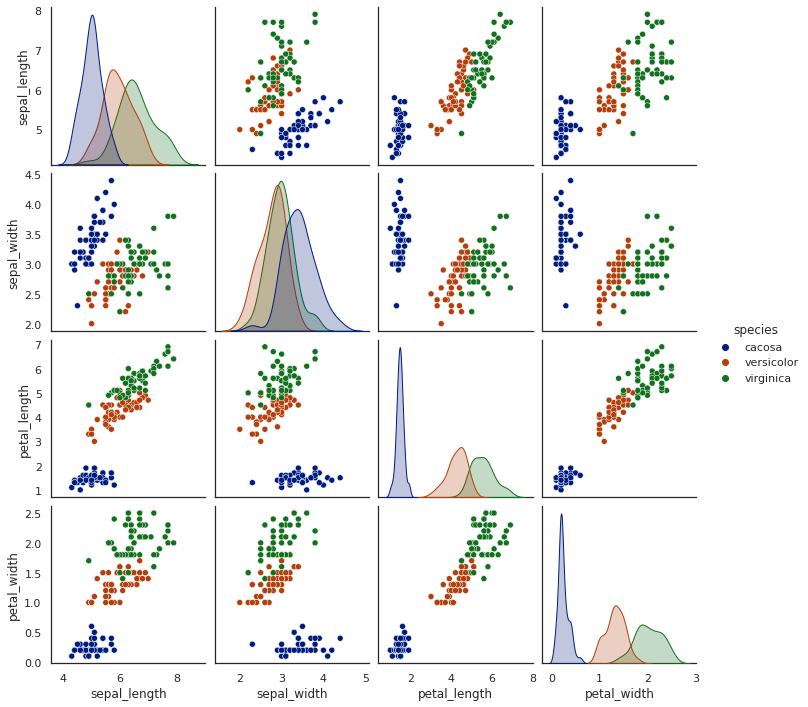

In [114]:
### BEGIN SOLUTION
sns.set_context('notebook')
sns.pairplot(data, hue='species');
### END SOLUTION

---
### Machine Learning Foundation (C) 2020 IBM Corporation